In [85]:
# pip install -U scikit-learn

In [32]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [33]:
sns.set_theme(rc = {"figure.figsize": (14, 4)})

In [34]:
diabetes = datasets.load_diabetes()
# print(type(diabetes))

In [77]:
# print(diabetes)
print(diabetes['DESCR'])
# diabetes['feature_names']

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [78]:
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
print(df.shape)

(442, 10)


---
- Comment traiter de facon adequate les valeurs aberrantes

In [79]:
draft = df = df[['bmi', 's1', 's2', 's3', 's4', 's5', 's6']]
df.head()

,bmi,s1,s2,s3,s4,s5,s6
0,0.061696,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.051474,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.044451,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.011595,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,-0.036385,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [80]:
copied = draft

---
- *Box plot*

In [39]:
def displayOutliers(data) -> None:
    sns.boxplot(data)
    plt.show()

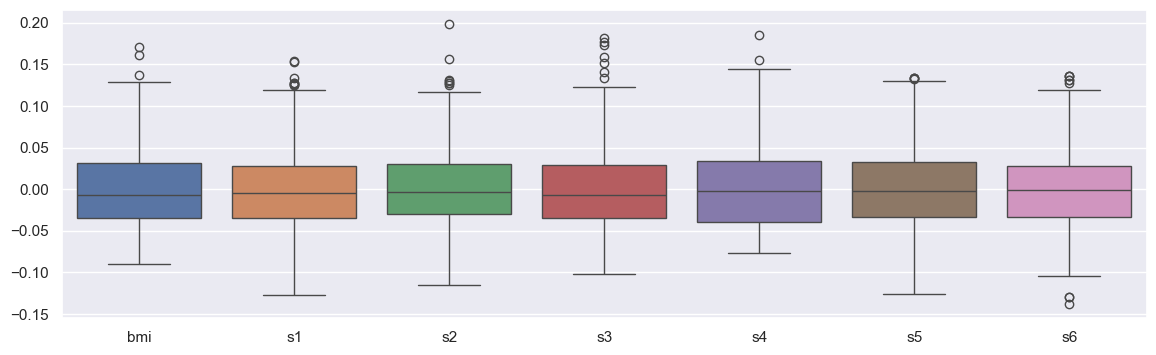

In [40]:
displayOutliers(df)

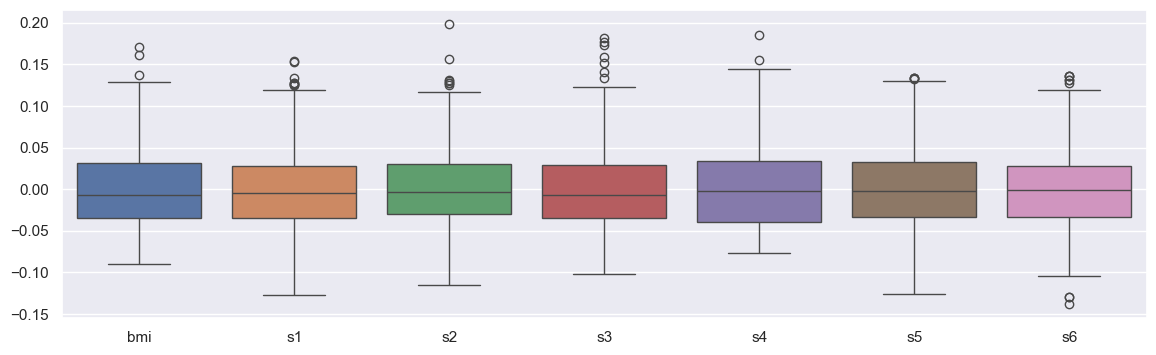

In [41]:
displayOutliers(df)

---
- **METHODE POUR REMPLACER LES OUTLIERS**

In [42]:
def impute_outliers(data, colname): 
    q1 = np.percentile(data[colname], 25)
    q3 = np.percentile(data[colname], 75) 

    lower_bound = q1 - 1.5*(q3 - q1)
    upper_bound = q3 + 1.5*(q3 - q1)

    data.loc[(data[colname] <= lower_bound), colname] = lower_bound
    data.loc[(data[colname] >= upper_bound), colname] = upper_bound

In [43]:
for colname in df.columns:
    impute_outliers(df, colname)

- Verifier que totu a ete bien remplace et qu'il n'ait pas trop d'ecart avant et apres le remplacement de valeurs aberrantes

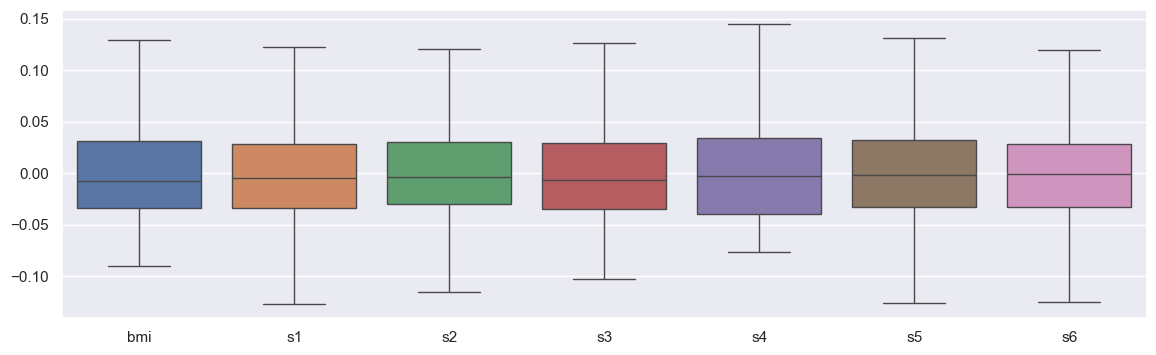

In [44]:
displayOutliers(df)

**SUPPRESSION DE VALEURS ABERRANTES**

In [71]:
def drop_outliers(data, colname):
    Q1 = np.percentile(data[colname], 25)
    Q3 = np.percentile(data[colname], 75)
    limit = 1.5*(Q3 - Q1)
    
    data.drop(data[data[colname] >= (limit + Q3)].index, inplace=True)
    data.drop(data[data[colname] <= (Q1 - limit)].index, inplace=True)

- Avant la suppression de valeurs aberrantes

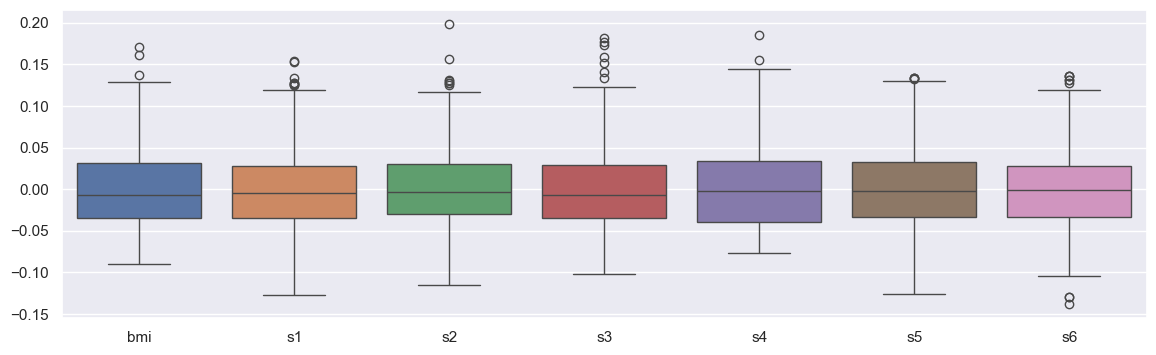

In [55]:
displayOutliers(draft)

In [72]:
for colname in draft.columns:
    drop_outliers(draft, colname)

- Verifier apres la suppression de valeurs aberrantes

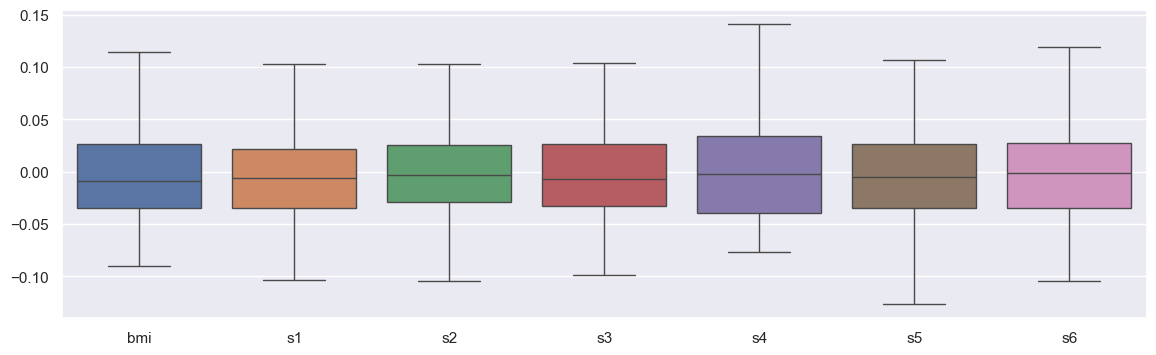

In [73]:
displayOutliers(draft)

---
- **EXTRACTION DE VALEURS ABERRANTES**

In [82]:
def extract_outliers(data, colname) -> pd.DataFrame:
    q1 = np.percentile(data[colname], 25)
    q3 = np.percentile(data[colname], 75) 

    iqr = q3 - q1
    
    lower_bound = q1 - 1.5*iqr
    upper_bound = q3 + 1.5*iqr
    
    return data[(data[colname] < lower_bound) | (data[colname] > upper_bound)]

In [83]:
for col in copied.columns:
    extract_outlier = extract_outliers(copied, col)

In [84]:
print(extract_outlier.shape)
extract_outlier

(9, 7)


,bmi,s1,s2,s3,s4,s5,s6
23,0.060618,0.028702,-0.047347,-0.054446,0.071210,0.133597,0.135612
84,-0.039618,-0.029088,-0.030124,0.044958,-0.050195,-0.068332,-0.129483
117,-0.021295,0.045213,0.031567,-0.047082,0.071210,0.079122,0.135612
141,0.047685,0.034206,0.057245,-0.080217,0.130252,0.045067,0.131470
168,0.059541,0.061725,0.063195,-0.058127,0.108111,0.068986,0.127328
245,-0.035307,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
350,0.060618,0.012191,-0.017598,-0.002903,-0.002592,0.070207,0.135612
406,-0.080575,-0.037344,-0.037013,0.033914,-0.039493,-0.056153,-0.137767
428,0.088642,0.035582,0.021546,-0.024993,0.034309,0.066051,0.131470
